In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('twentyeleven.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04T10:00:00Z,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
2,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
3,539993.0,22379,RECYCLING BAG RETROSPOT,5,2011-01-04T10:00:00Z,2.10,13313.0,United Kingdom,2011-01-04,10.5,2011
4,539993.0,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04T10:00:00Z,1.25,13313.0,United Kingdom,2011-01-04,12.5,2011


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484330 entries, 0 to 484329
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      484329 non-null  float64
 1   StockCode    484330 non-null  object 
 2   Description  484330 non-null  object 
 3   Quantity     484330 non-null  int64  
 4   InvoiceDate  484330 non-null  object 
 5   Price        484330 non-null  float64
 6   Customer ID  367058 non-null  float64
 7   Country      484330 non-null  object 
 8   date         484330 non-null  object 
 9   revenue      484330 non-null  float64
 10  year         484330 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 40.6+ MB


In [4]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04T10:00:00Z,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
2,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
3,539993.0,22379,RECYCLING BAG RETROSPOT,5,2011-01-04T10:00:00Z,2.10,13313.0,United Kingdom,2011-01-04,10.5,2011
4,539993.0,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04T10:00:00Z,1.25,13313.0,United Kingdom,2011-01-04,12.5,2011


In [5]:
df_grouped = df.groupby(['Description', 'date']).agg(total_sales = ('Quantity', 'sum')).reset_index()
df_grouped.head()

,Description,date,total_sales
0,10 COLOUR SPACEBOY PEN,2011-01-05,2
1,10 COLOUR SPACEBOY PEN,2011-01-06,72
2,10 COLOUR SPACEBOY PEN,2011-01-09,60
3,10 COLOUR SPACEBOY PEN,2011-01-11,24
4,10 COLOUR SPACEBOY PEN,2011-01-13,36


In [6]:
cv_data = df_grouped.groupby('Description').agg(average_sales = ('total_sales', 'mean'), std = ('total_sales', 'std')).reset_index()
cv_data['cv_squared'] = (cv_data['std']/cv_data['average_sales'])**2
cv_data.head()

,Description,average_sales,std,cv_squared
0,10 COLOUR SPACEBOY PEN,36.030120,46.870217,1.692242
1,12 COLOURED PARTY BALLOONS,18.017391,16.152770,0.803730
2,12 DAISY PEGS IN WOOD BOX,5.533333,6.379168,1.329090
3,12 EGG HOUSE PAINTED WOOD,1.864865,1.306719,0.490987
4,12 HANGING EGGS HAND PAINTED,6.666667,3.669696,0.303000


In [7]:
product_by_date = df.groupby(by = ['Description', 'date']).agg(count = ('Description', 'count')).reset_index()
product_by_date.head()

,Description,date,count
0,10 COLOUR SPACEBOY PEN,2011-01-05,1
1,10 COLOUR SPACEBOY PEN,2011-01-06,3
2,10 COLOUR SPACEBOY PEN,2011-01-09,3
3,10 COLOUR SPACEBOY PEN,2011-01-11,1
4,10 COLOUR SPACEBOY PEN,2011-01-13,2


In [8]:
skus = product_by_date['Description'].unique()
skus

array(['10 COLOUR SPACEBOY PEN', '12 COLOURED PARTY BALLOONS',
       '12 DAISY PEGS IN WOOD BOX', ..., 'wrongly marked',
       'wrongly marked 23343', 'wrongly sold (22719) barcode'],
      shape=(3960,), dtype=object)

In [9]:
print(product_by_date['Description'].value_counts())

Description
WHITE HANGING HEART T-LIGHT HOLDER    284
ASSORTED COLOUR BIRD ORNAMENT         282
REGENCY CAKESTAND 3 TIER              281
JUMBO BAG RED RETROSPOT               281
PACK OF 72 RETROSPOT CAKE CASES       280
                                     ... 
wrongly coded 20713                     1
wrongly coded 23343                     1
wrongly marked                          1
wrongly marked 23343                    1
wrongly sold (22719) barcode            1
Name: count, Length: 3960, dtype: int64


In [10]:
empty_dataframe = pd.DataFrame()

for sku in skus:
    a = product_by_date[product_by_date['Description'] == sku]
    a['previous_date'] = a['date'].shift(1)
    empty_dataframe = pd.concat([empty_dataframe, a], axis = 0)

empty_dataframe

C:\Users\thanh\AppData\Local\Temp\ipykernel_18244\1930722454.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date'] = a['date'].shift(1)
C:\Users\thanh\AppData\Local\Temp\ipykernel_18244\1930722454.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['previous_date'] = a['date'].shift(1)
C:\Users\thanh\AppData\Local\Temp\ipykernel_18244\1930722454.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Description,date,count,previous_date
0,10 COLOUR SPACEBOY PEN,2011-01-05,1,NaT
1,10 COLOUR SPACEBOY PEN,2011-01-06,3,2011-01-05
2,10 COLOUR SPACEBOY PEN,2011-01-09,3,2011-01-06
3,10 COLOUR SPACEBOY PEN,2011-01-11,1,2011-01-09
4,10 COLOUR SPACEBOY PEN,2011-01-13,2,2011-01-11
...,...,...,...,...
255715,wrongly coded 20713,2011-10-06,1,NaT
255716,wrongly coded 23343,2011-10-27,1,NaT
255717,wrongly marked,2011-10-31,1,NaT
255718,wrongly marked 23343,2011-10-24,1,NaT


In [11]:
empty_dataframe['previous_date'][0] = np.nan
empty_dataframe['previous_date'] = pd.to_datetime(empty_dataframe['previous_date'])
empty_dataframe['date'] = pd.to_datetime(empty_dataframe['date'])
empty_dataframe['duration'] = empty_dataframe['date'] - empty_dataframe['previous_date']

C:\Users\thanh\AppData\Local\Temp\ipykernel_18244\4014835474.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  empty_dataframe['previous_date'][0] = np.nan
C:\Users\thanh\AppData\Local\Temp\ipykernel_18244\4014835474.py:1: SettingWithCopyW

In [12]:
empty_dataframe['duration'] = empty_dataframe['duration'].astype(str)
empty_dataframe['duration'] = empty_dataframe['duration'].str.replace(' days','')
empty_dataframe['duration'] = pd.to_numeric(empty_dataframe['duration'], errors = 'coerce')
empty_dataframe

,Description,date,count,previous_date,duration
0,10 COLOUR SPACEBOY PEN,2011-01-05,1,NaT,NaN
1,10 COLOUR SPACEBOY PEN,2011-01-06,3,2011-01-05,1.0
2,10 COLOUR SPACEBOY PEN,2011-01-09,3,2011-01-06,3.0
3,10 COLOUR SPACEBOY PEN,2011-01-11,1,2011-01-09,2.0
4,10 COLOUR SPACEBOY PEN,2011-01-13,2,2011-01-11,2.0
...,...,...,...,...,...
255715,wrongly coded 20713,2011-10-06,1,NaT,NaN
255716,wrongly coded 23343,2011-10-27,1,NaT,NaN
255717,wrongly marked,2011-10-31,1,NaT,NaN
255718,wrongly marked 23343,2011-10-24,1,NaT,NaN


In [13]:
average_demand_interval = empty_dataframe.groupby(by = 'Description').agg(ADI = ('duration', 'mean')).reset_index()
average_demand_interval

,Description,ADI
0,10 COLOUR SPACEBOY PEN,2.048485
1,12 COLOURED PARTY BALLOONS,2.894737
2,12 DAISY PEGS IN WOOD BOX,4.745763
3,12 EGG HOUSE PAINTED WOOD,4.602740
4,12 HANGING EGGS HAND PAINTED,4.400000
...,...,...
3955,wrongly coded 20713,NaN
3956,wrongly coded 23343,NaN
3957,wrongly marked,NaN
3958,wrongly marked 23343,NaN


In [14]:
adi_cv = pd.merge(average_demand_interval, cv_data)
adi_cv

,Description,ADI,average_sales,std,cv_squared
0,10 COLOUR SPACEBOY PEN,2.048485,36.030120,46.870217,1.692242
1,12 COLOURED PARTY BALLOONS,2.894737,18.017391,16.152770,0.803730
2,12 DAISY PEGS IN WOOD BOX,4.745763,5.533333,6.379168,1.329090
3,12 EGG HOUSE PAINTED WOOD,4.602740,1.864865,1.306719,0.490987
4,12 HANGING EGGS HAND PAINTED,4.400000,6.666667,3.669696,0.303000
...,...,...,...,...,...
3955,wrongly coded 20713,NaN,800.000000,NaN,NaN
3956,wrongly coded 23343,NaN,1000.000000,NaN,NaN
3957,wrongly marked,NaN,48.000000,NaN,NaN
3958,wrongly marked 23343,NaN,200.000000,NaN,NaN


In [15]:
def category(df):
    a = 0
    if (df['ADI'] <= 1.34) & (df['cv_squared'] <= 0.49):
        a = 'smooth'
    elif (df['ADI'] > 1.34) & (df['cv_squared'] > 0.49):
        a = 'lumpy'
    elif (df['ADI'] <= 1.34) & (df['cv_squared'] > 0.49):
        a = 'erractic'
    else:
        a = 'intermittent'
    return a

<Axes: xlabel='cv_squared', ylabel='ADI'>

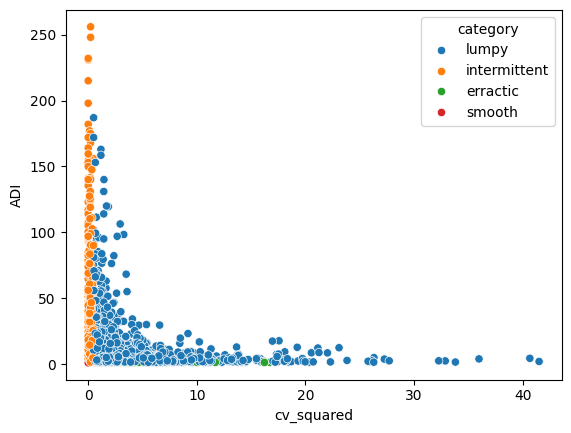

In [16]:
adi_cv['category'] = adi_cv.apply(func = category, axis = 1)
sns.scatterplot(data = adi_cv, x = adi_cv['cv_squared'], y = adi_cv['ADI'], hue = adi_cv['category'])

In [17]:
adi_cv['category'].value_counts()

category
lumpy           3037
intermittent     777
erractic         141
smooth             5
Name: count, dtype: int64